In [24]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder

In [25]:
df = pl.read_csv("./data/raw_data/train.csv")
mini_df = df[:, :17]
mini_df.describe()

statistic,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1280.0,"""1280""","""1279""","""1280""","""1253""","""1280""",1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,834.0,1280.0,1280.0
"""null_count""",0.0,"""0""","""1""","""0""","""27""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,446.0,0.0,0.0
"""mean""",640.5,null,null,null,null,null,0.592414,0.114844,0.047656,0.163281,0.671094,0.421875,0.178906,0.010156,57.388489,0.955469,0.265625
"""std""",369.648482,null,null,null,null,null,0.108669,null,null,null,null,null,null,null,31.695205,null,null
"""min""",1.0,"""Job_Title_1""","""2018/11""","""High""","""AK""","""A""",0.3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
"""25%""",321.0,null,null,null,null,null,0.4705,null,null,null,null,null,null,null,36.0,null,null
"""50%""",641.0,null,null,null,null,null,0.5995,null,null,null,null,null,null,null,60.0,null,null
"""75%""",960.0,null,null,null,null,null,0.6853,null,null,null,null,null,null,null,60.0,null,null
"""max""",1280.0,"""Others""","""2024/08""","""Medium""","""WA""","""E""",0.9063,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,1.0,1.0


In [35]:
df.describe()

statistic,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,…,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1280.0,"""1280""","""1279""","""1280""","""1253""","""1280""",1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,834.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,…,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0
"""null_count""",0.0,"""0""","""1""","""0""","""27""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",640.5,null,null,null,null,null,0.592414,0.114844,0.047656,0.163281,0.671094,0.421875,0.178906,0.010156,57.388489,0.955469,0.265625,0.195011,1.775129,-0.471561,-0.106538,-0.056146,-0.283087,-0.489879,-0.394381,-0.433959,0.250222,-0.272348,-0.555366,0.348308,-0.247826,0.09907,-0.040115,0.13444,-0.256554,0.358016,…,-0.570992,-0.137683,0.320998,-0.086025,0.074018,-0.30658,-0.058764,-0.303084,-0.065431,0.2998,-0.415419,0.43671,-0.139069,-0.202394,0.200998,-0.070996,0.278148,-0.536593,-0.026847,0.318656,0.262736,-0.647137,-0.097833,-0.106543,0.064172,-0.449721,-0.153953,-0.229636,-0.504288,-0.3373,-0.205454,0.062491,-0.289679,-0.125236,-0.609413,-0.697959,-0.065607
"""std""",369.648482,null,null,null,null,null,0.108669,null,null,null,null,null,null,null,31.695205,null,null,0.223345,0.786083,0.291197,0.291319,0.145954,0.196887,0.263636,0.220609,0.274802,0.231031,0.271441,0.270503,0.232863,0.200787,0.188265,0.195154,0.167635,0.172791,0.225742,…,0.2974,0.191215,0.210667,0.172003,0.210857,0.210883,0.171822,0.214706,0.185063,0.192699,0.283185,0.274471,0.156434,0.184302,0.179085,0.181233,0.216938,0.304471,0.171523,0.205947,0.220991,0.308327,0.22878,0.175808,0.173883,0.224591,0.261917,0.230086,0.297868,0.243932,0.243926,0.142622,0.194618,0.160217,0.280257,0.333347,0.149354
"""min""",1.0,"""Job_Title_1""","""2018/11""","""High""","""AK""","""A""",0.3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,-0.763939,0.0,-2.138069,-1.69923,-0.720396,-0.814064,-1.426136,-1.298331,-1.400854,-0.822073,-1.43582,-1.205775,-0.917102,-0.829142,-0.724771,-1.060741,-0.445423,-0.915456,-0.378092,…,-1.423798,-0.84544,-0.549458,-0.866594,-0.716621,-1.096527,-1.035132,-1.029515,-1.201307,-1.063267,-1.46855,-0.692713,-0.857935,-0.886774,-0.730142,-0.755855,-0.319292,-1.428641,-1.130273,-0.465426,-0.874737,-1.474634,-0.935107,-1.170864,-0.815827,-1.091242,-1.805645,-1.139693,-1.553501,-1.308425,-1.05683,-

<Axes: ylabel='Count'>

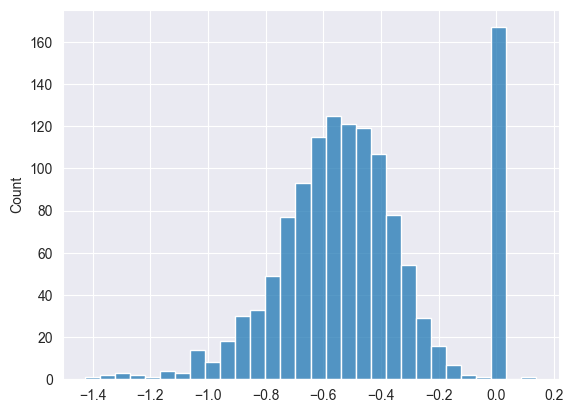

In [42]:
sns.histplot(df["job_desc_007"])

In [26]:
mini_df.head()

obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
i64,str,str,str,str,str,f64,bool,bool,bool,bool,bool,bool,bool,f64,bool,bool
1,"""Others""","""2024/07""","""High""","""NY""","""A""",0.6429,false,false,true,true,true,false,false,60.0,true,false
2,"""Job_Title_1""","""2024/07""","""Low""","""CA""","""A""",0.4678,false,false,false,true,true,true,false,60.0,true,true
3,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.461,false,false,false,true,true,true,false,36.0,true,true
4,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.5064,false,false,false,true,true,true,false,72.0,true,true
5,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.464,false,false,false,true,true,false,false,48.0,true,true


In [27]:
mini_df_adj = mini_df.with_columns(
    pl.col("job_posted_date").str.strptime(pl.Date, format="%Y/%m"),
    pl.col("job_title").cast(pl.Categorical),
    pl.col("salary_category").cast(pl.Categorical),
    pl.col("job_state").cast(pl.Categorical),
    pl.col("feature_1").cast(pl.Categorical),
    pl.col(pl.Boolean).cast(pl.Int32)
)

In [28]:
mini_df_adj.describe()

statistic,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1280.0,"""1280""","""1279""","""1280""","""1253""","""1280""",1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,834.0,1280.0,1280.0
"""null_count""",0.0,"""0""","""1""","""0""","""27""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,446.0,0.0,0.0
"""mean""",640.5,null,"""2024-03-09 21:42:38.561000""",null,null,null,0.592414,0.114844,0.047656,0.163281,0.671094,0.421875,0.178906,0.010156,57.388489,0.955469,0.265625
"""std""",369.648482,null,null,null,null,null,0.108669,0.318958,0.213121,0.369767,0.469999,0.494052,0.383424,0.100304,31.695205,0.206353,0.441838
"""min""",1.0,null,"""2018-11-01""",null,null,null,0.3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
"""25%""",321.0,null,"""2024-04-01""",null,null,null,0.4705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1.0,0.0
"""50%""",641.0,null,"""2024-07-01""",null,null,null,0.5995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,1.0,0.0
"""75%""",960.0,null,"""2024-07-01""",null,null,null,0.6853,0.0,0.0,0.0,1.0,1.0,0.0,0.0,60.0,1.0,1.0
"""max""",1280.0,null,"""2024-08-01""",null,null,null,0.9063,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,1.0,1.0


In [34]:
# 1. Find all the categorical columns in self.data
cat_cols = [
    name
    for name, dtype in mini_df_adj.schema.items()
    if dtype == pl.Categorical
]

# 2. For each cat-col, get value_counts and tag it with the column name
counts = []
for c in cat_cols:
            # 2a. Select just that column, then call DataFrame.value_counts()
            vc = (
                mini_df_adj[c]
                  .value_counts()            # yields columns: c, "count"
                  .rename({c: "value"})     # rename the category column to "value"
                  .with_columns(pl.lit(c).alias("column"))
            )
            counts.append(vc)

# 3. Concatenate all of them
out = pl.concat(counts, how="vertical")

out

sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


value,count,column
cat,u32,str
"""Others""",889,"""job_title"""
"""Job_Title_1""",27,"""job_title"""
"""Job_Title_2""",32,"""job_title"""
"""Job_Title_3""",46,"""job_title"""
"""Job_Title_4""",5,"""job_title"""
…,…,…
"""A""",1232,"""feature_1"""
"""B""",36,"""feature_1"""
"""C""",6,"""feature_1"""
